# load_data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [2]:
test_df = pd.read_csv("../test.tsv", delimiter="\t")
test_osaka_df = pd.read_csv("../test_local_osaka3.tsv", delimiter="\t")
test_tokyo_df = pd.read_csv("../test_local_tokyo.tsv", delimiter="\t")

In [3]:
# group3_vesion_results
test_group3_rslt_df = pd.read_csv("./p.csv", delimiter="\t", header=None)
osaka_group3_rslt_df = pd.read_csv("./q.csv", delimiter="\t", header=None)
tokyo_group3_rslt_df = pd.read_csv("./tokyo.csv", header=None).iloc[:, -1]

test_group3_rslt = np.array(test_group3_rslt_df).reshape(-1)
osaka_group3_rslt = np.array(osaka_group3_rslt_df).reshape(-1)
tokyo_group3_rslt = np.array(tokyo_group3_rslt_df)

In [4]:
train_df = pd.read_csv("../train.tsv", delimiter="\t")

In [5]:
# group5_origin_results
test_group5_rslt_df = pd.read_csv("../rhorizon8がいじってみた/p.csv", delimiter="\t", header=None)
osaka_group5_rslt_df = pd.read_csv("../rhorizon8がいじってみた/q.csv", delimiter="\t", header=None)
tokyo_group5_rslt_df = pd.read_csv("../rhorizon8がいじってみた/tokyo.csv", header=None).iloc[:, -1]

test_group5_rslt = np.array(test_group5_rslt_df).reshape(-1)
osaka_group5_rslt = np.array(osaka_group5_rslt_df).reshape(-1)
tokyo_group5_rslt = np.array(tokyo_group5_rslt_df)

In [6]:
test_group3_df = pd.concat([test_df, pd.DataFrame(test_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
osaka_group3_df = pd.concat([test_osaka_df, pd.DataFrame(osaka_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
tokyo_group3_df = pd.concat([test_tokyo_df, pd.DataFrame(tokyo_group3_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)

test_group5_df = pd.concat([test_df, pd.DataFrame(test_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
osaka_group5_df = pd.concat([test_osaka_df, pd.DataFrame(osaka_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)
tokyo_group5_df = pd.concat([test_tokyo_df, pd.DataFrame(tokyo_group5_rslt.reshape(-1, 1), columns=['cnt'])], axis=1)

In [7]:
rslt_data = {
    "test_group3_df": test_group3_df,
    "osaka_group3_df": osaka_group3_df,
    "tokyo_group3_df": tokyo_group3_df,
    "test_group5_df": test_group5_df,
    "osaka_group5_df": osaka_group5_df,
    "tokyo_group5_df": tokyo_group5_df
}

for key, value in rslt_data.items():
  print(f"{key}: {value.size}")

test_group3_df: 131010
osaka_group3_df: 131370
tokyo_group3_df: 131355
test_group5_df: 131010
osaka_group5_df: 131370
tokyo_group5_df: 131355


In [8]:
header = list(test_group3_df.columns)
print(header)

['id', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [9]:
def mk_graph_pra2cnt(data_frame, param_name):
  ax = data_frame.groupby(param_name)["cnt"].mean().plot()
  ax.set_title(f"Average number of users by {param_name}")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  plt.show()
  # return ax

In [10]:
def mk_graph_pra2cnt2(data_frame1, data_frame1_name, data_frame2, data_frame2_name, param_name, tag = None):
  if os.path.exists(f"../collabo_data/cnt_{tag}") == False:
    os.mkdir(f"../collabo_data/cnt_{tag}")
  ax = data_frame1.groupby(param_name)["cnt"].mean().plot(label=data_frame1_name)
  data_frame2.groupby(param_name)["cnt"].mean().plot(label=data_frame2_name)
  ax.set_title(f"Average number of users by {param_name} : ({tag})")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  ax.legend()
  plt.savefig(f"../collabo_data/cnt_{tag}/cnt_{param_name}_{tag}.png")
  plt.show()
  ax.cla()
  # return ax

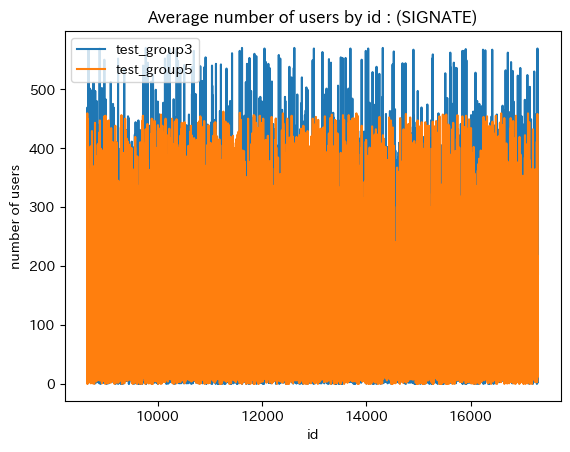

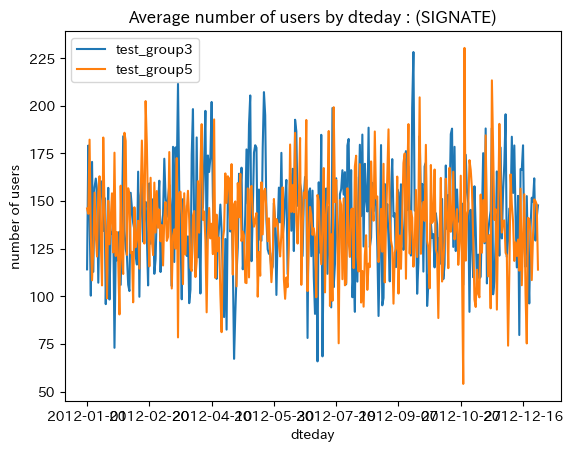

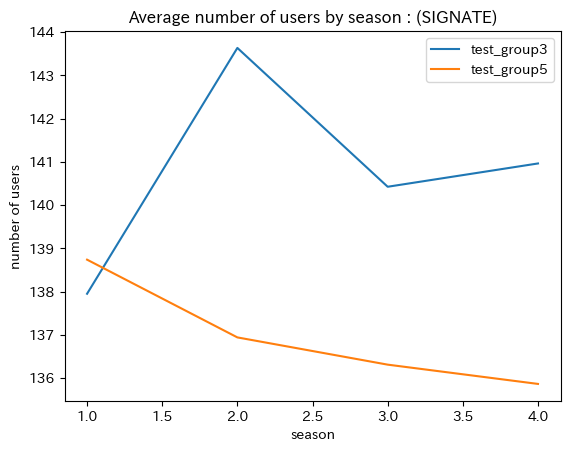

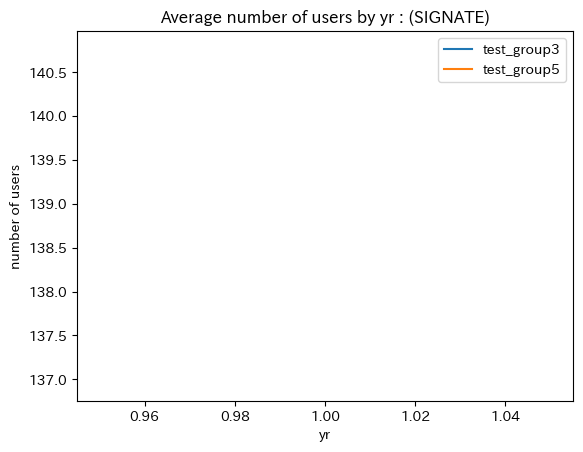

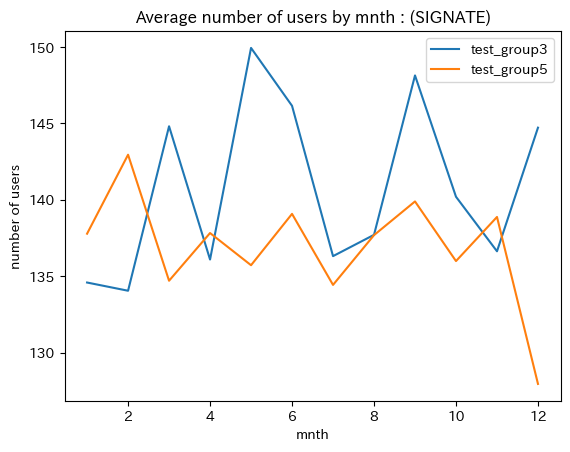

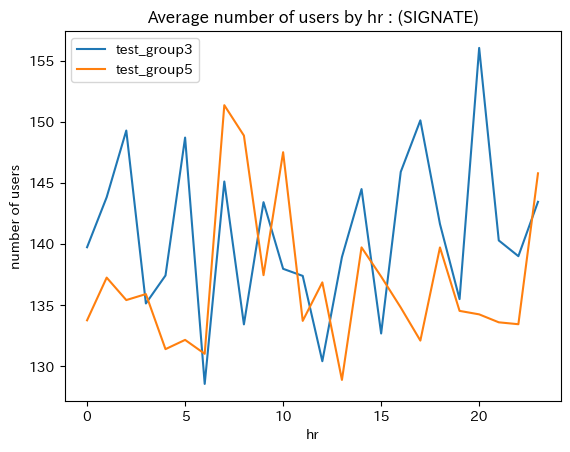

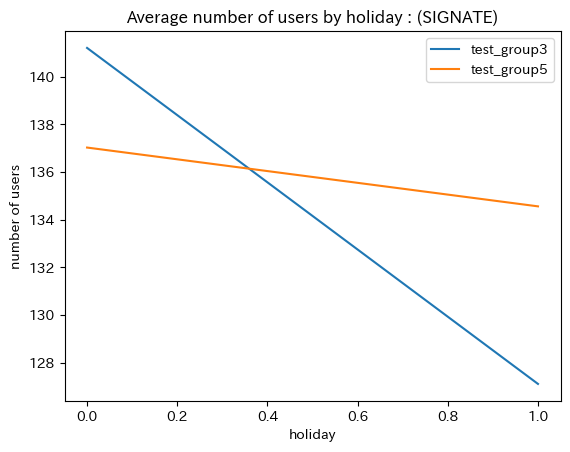

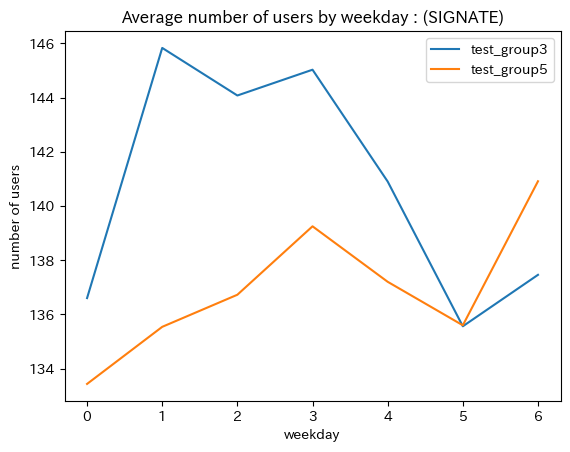

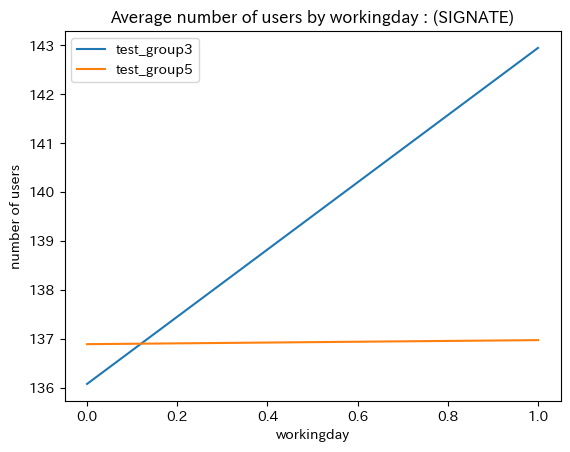

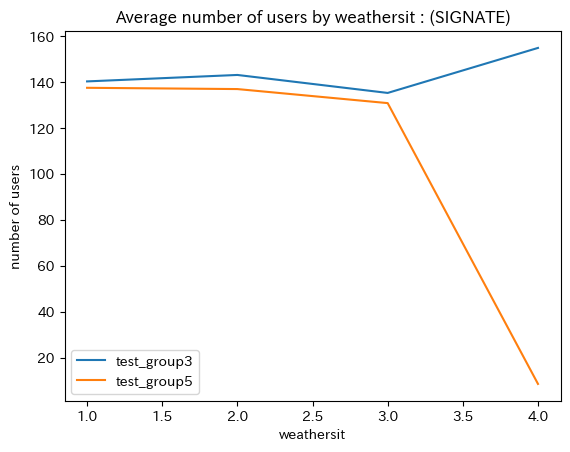

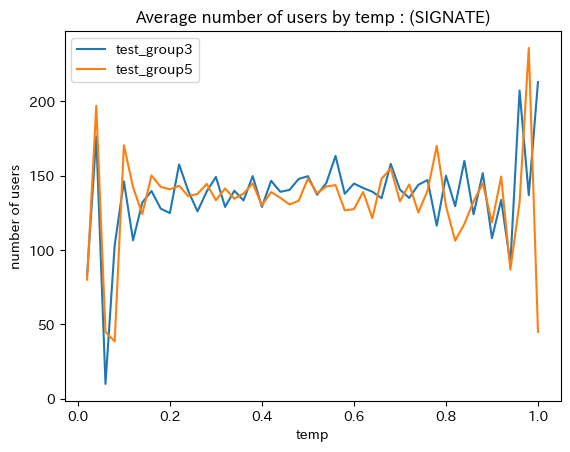

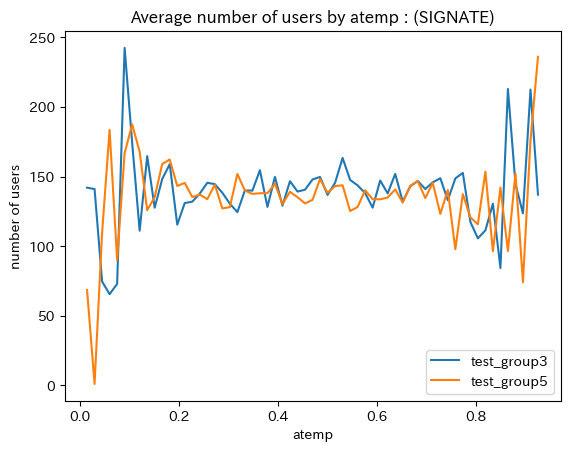

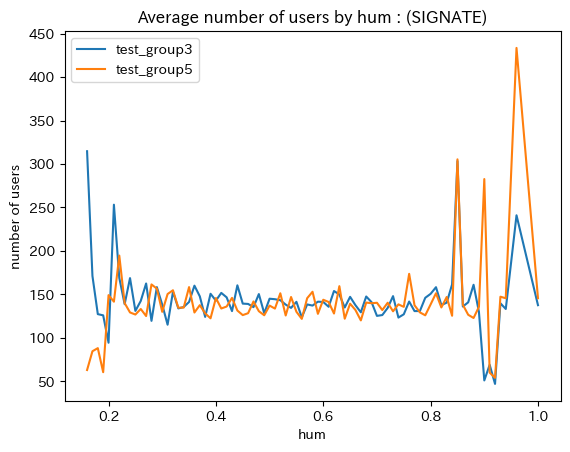

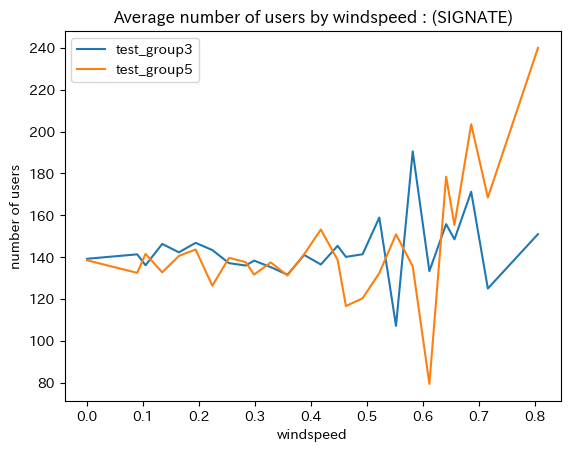

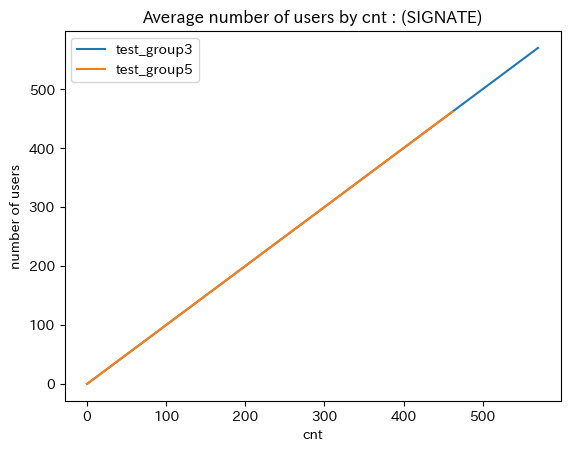

In [11]:
for i in range(len(header)):
  mk_graph_pra2cnt2(test_group3_df, "test_group3", test_group5_df, "test_group5", header[i], tag = "SIGNATE")

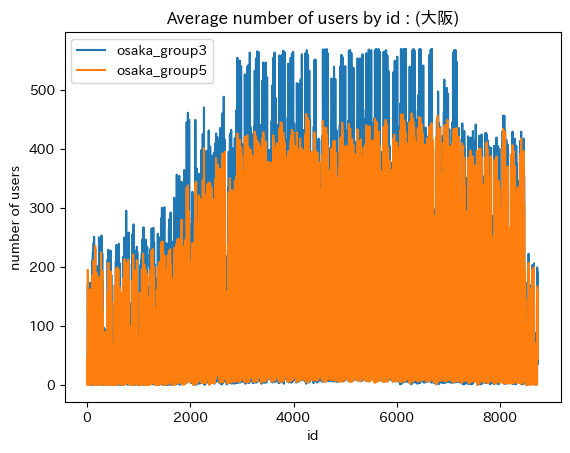

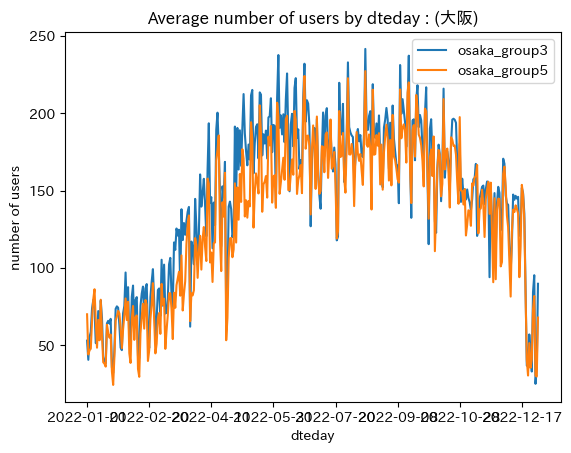

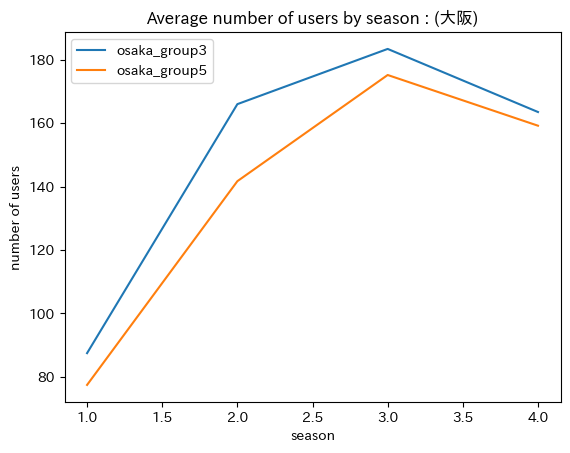

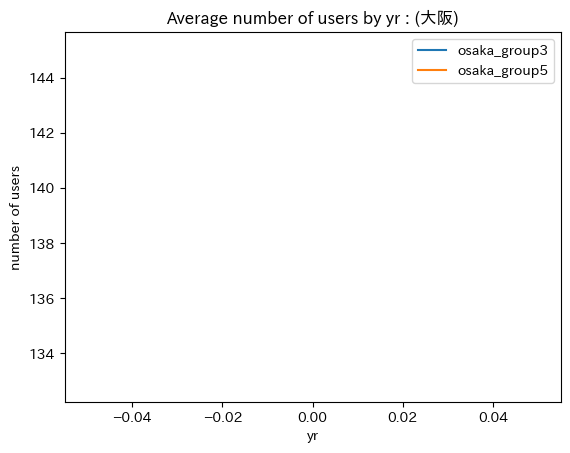

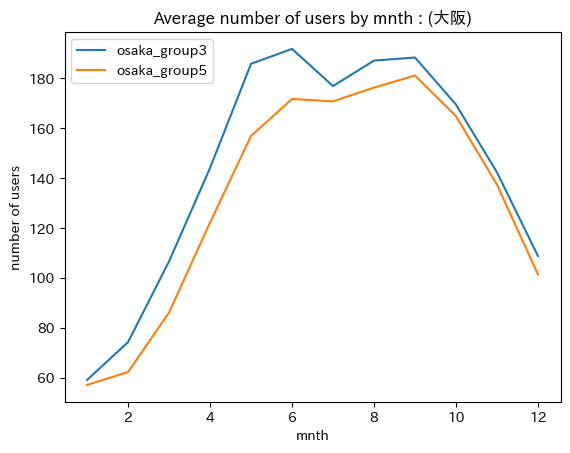

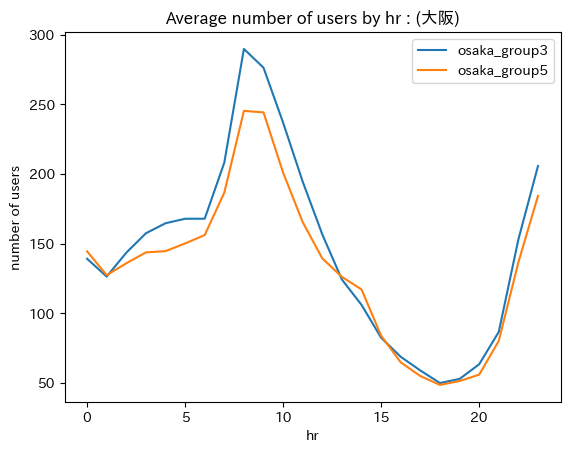

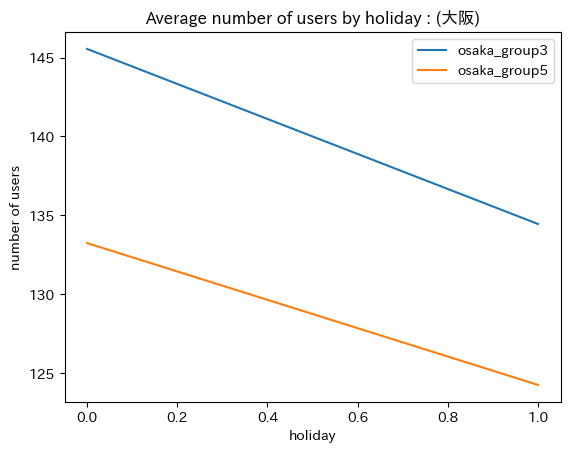

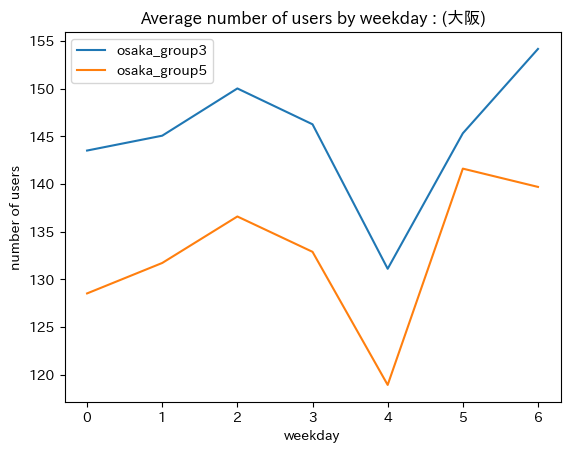

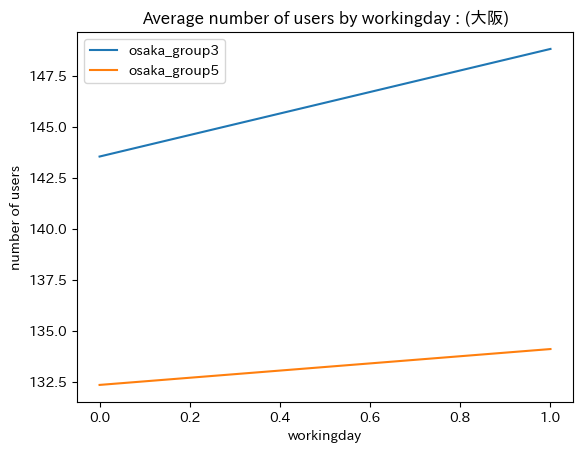

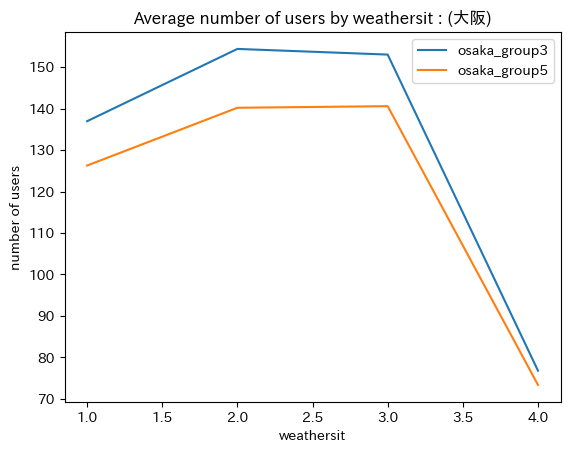

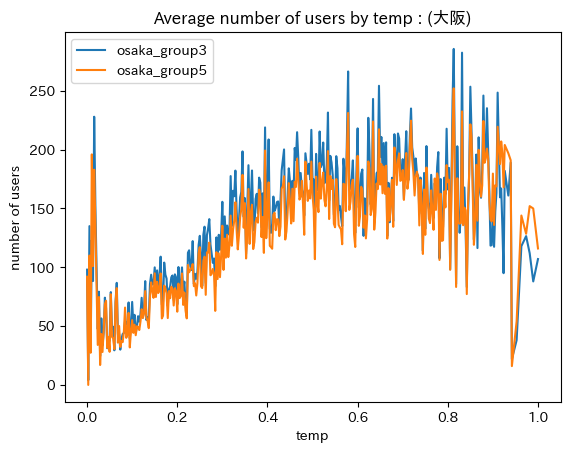

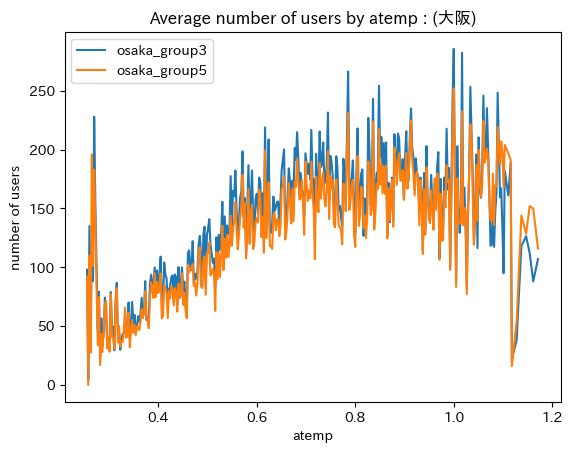

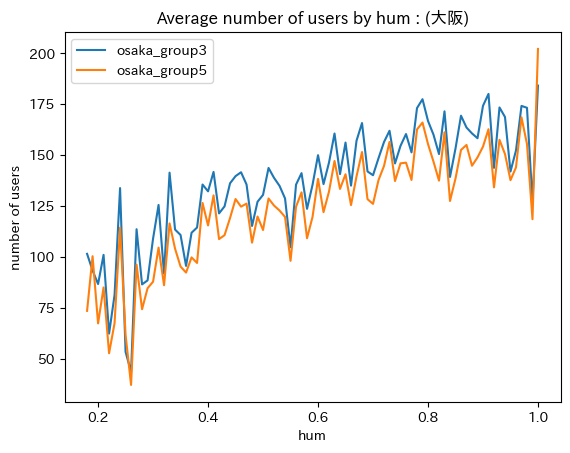

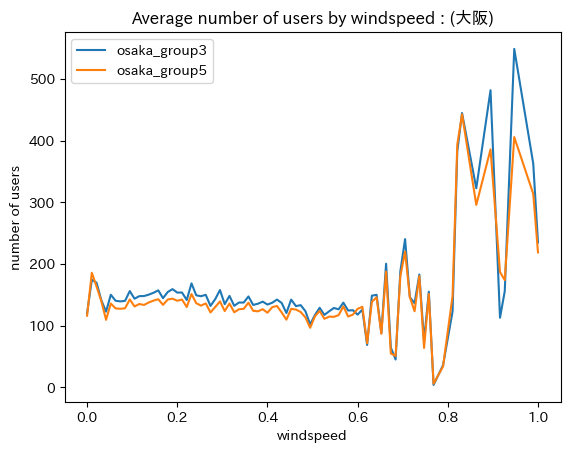

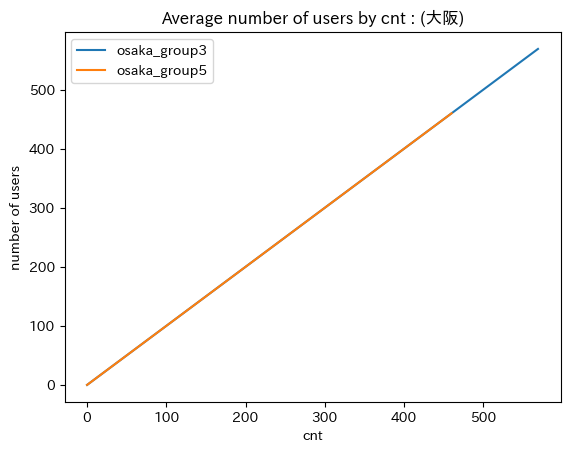

In [12]:
for i in range(len(header)):
  mk_graph_pra2cnt2(osaka_group3_df, "osaka_group3", osaka_group5_df, "osaka_group5", header[i], tag = "大阪")

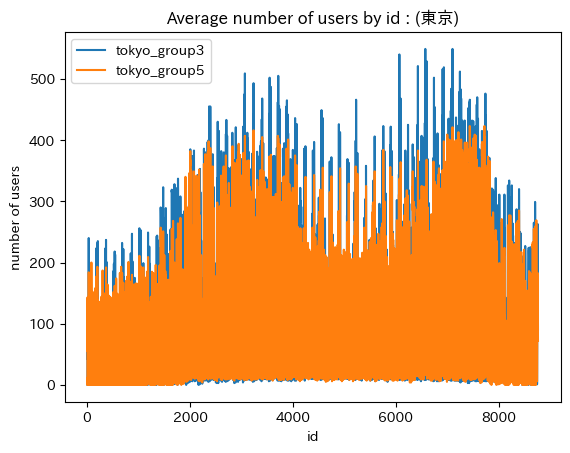

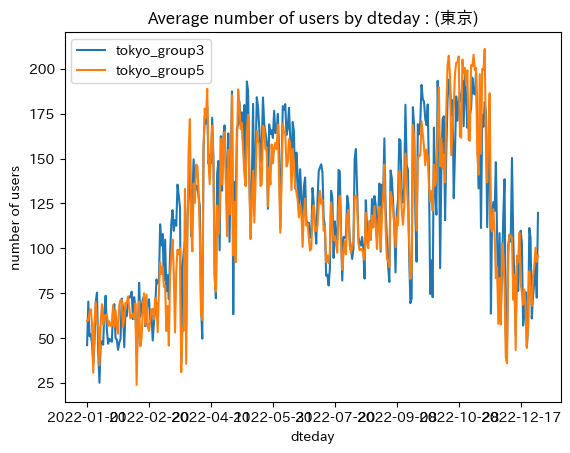

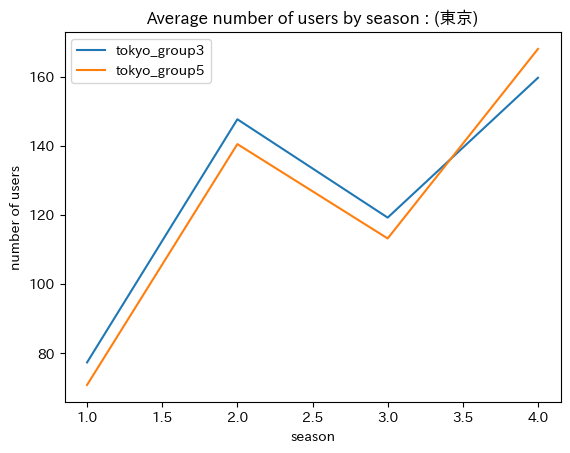

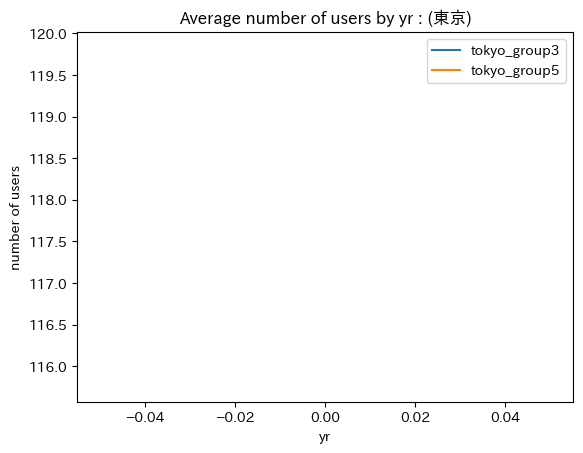

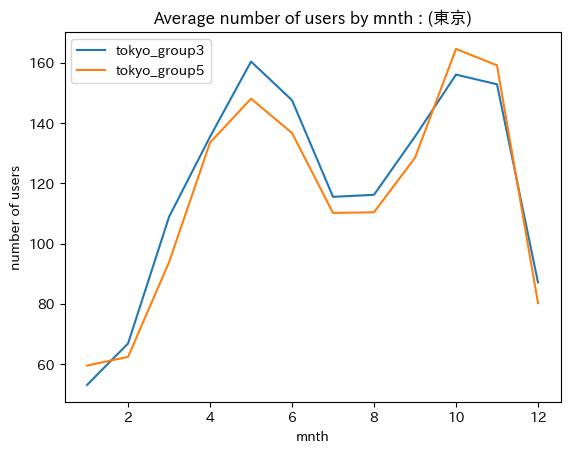

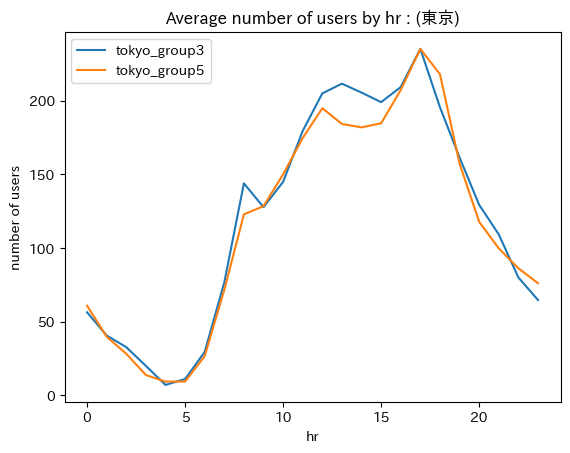

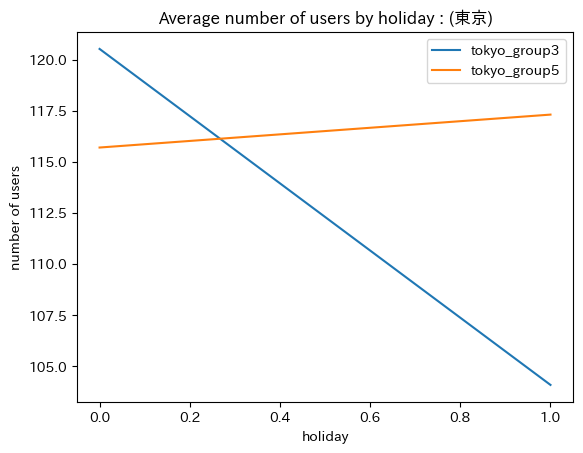

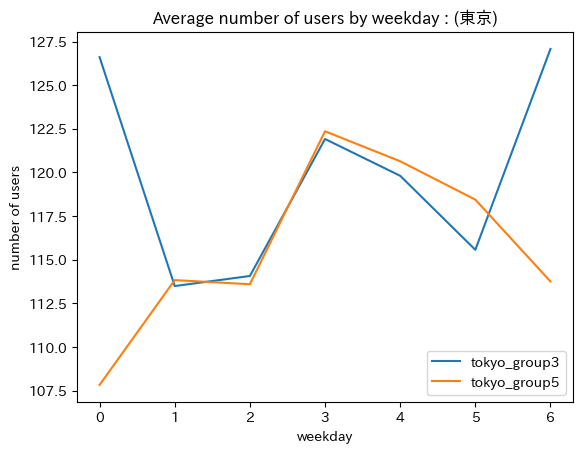

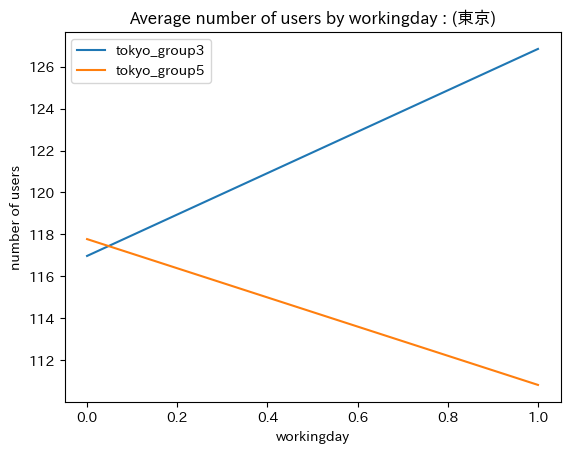

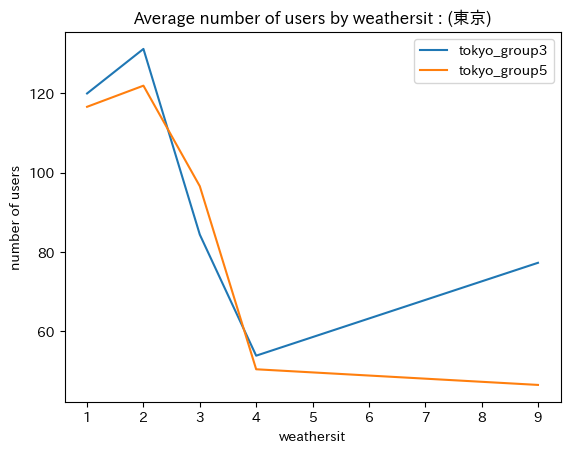

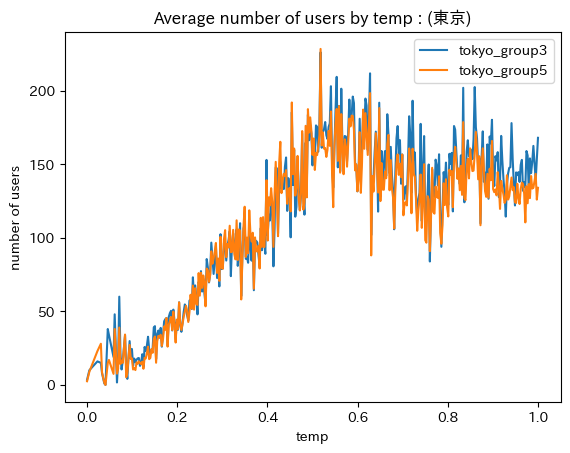

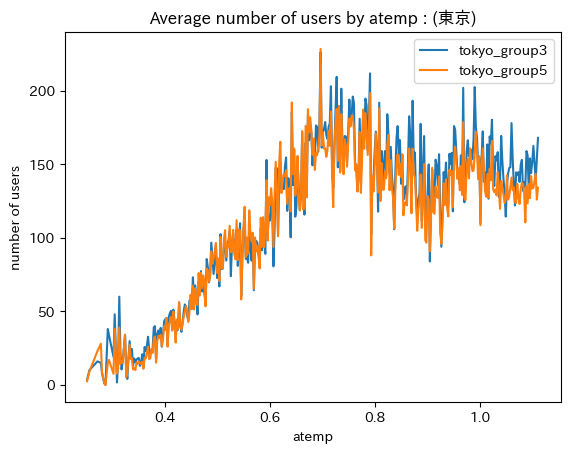

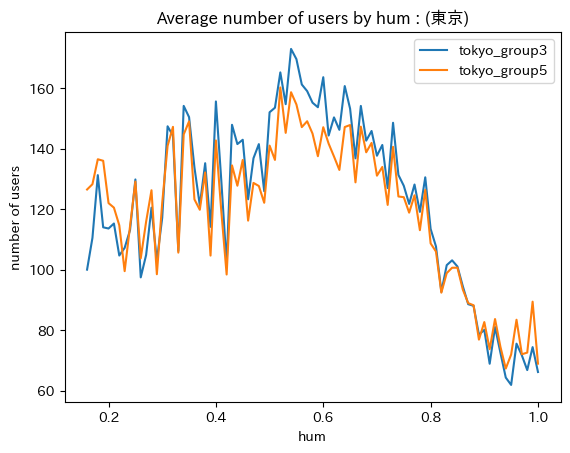

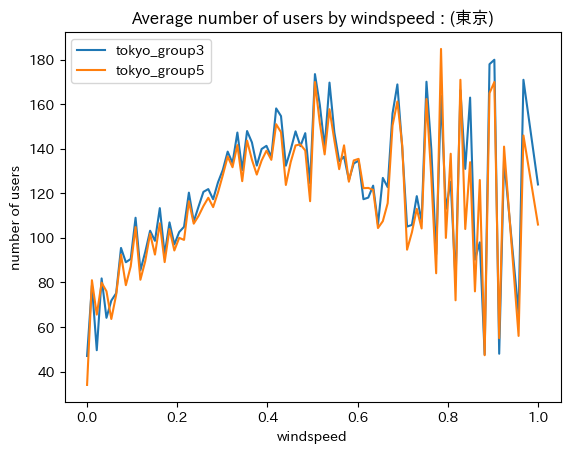

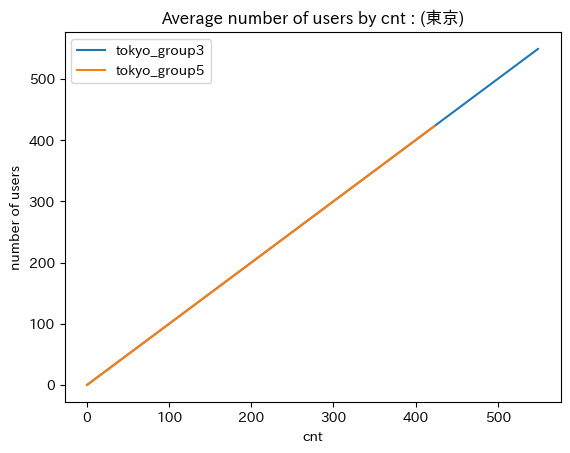

In [13]:
for i in range(len(header)):
  mk_graph_pra2cnt2(tokyo_group3_df, "tokyo_group3", tokyo_group5_df, "tokyo_group5", header[i], tag = "東京")

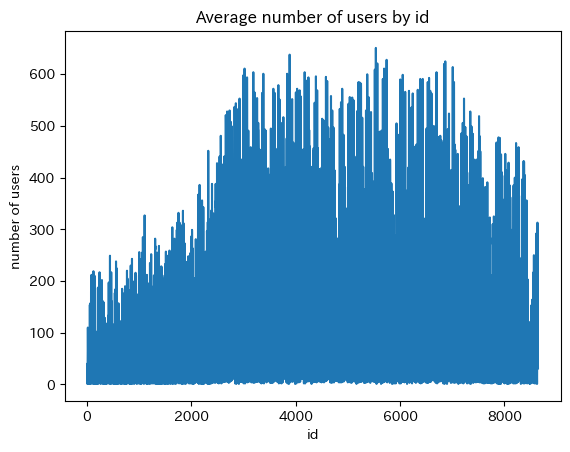

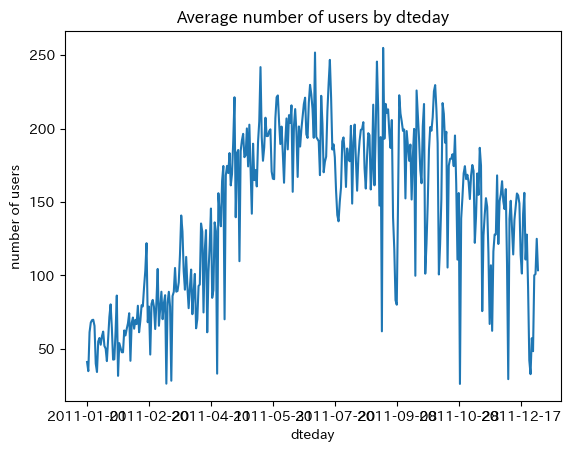

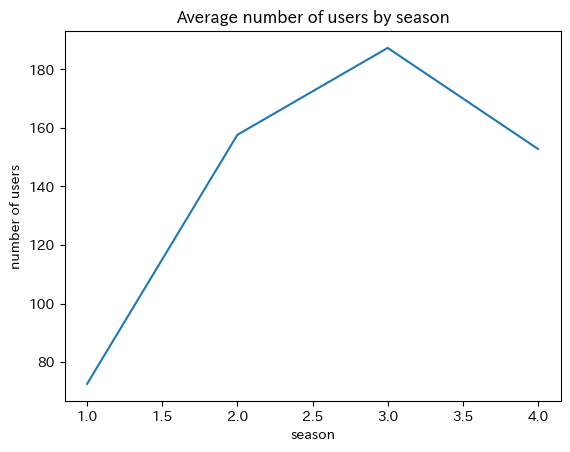

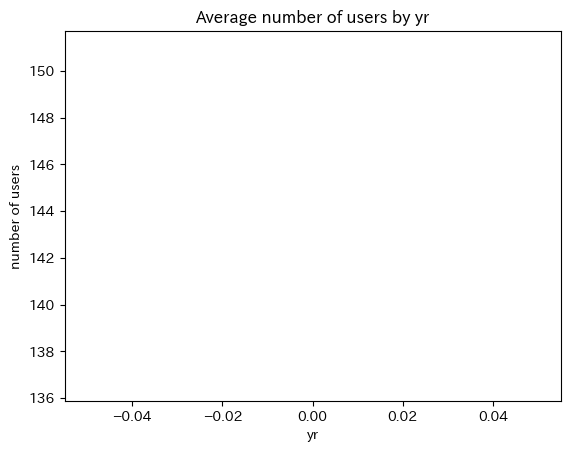

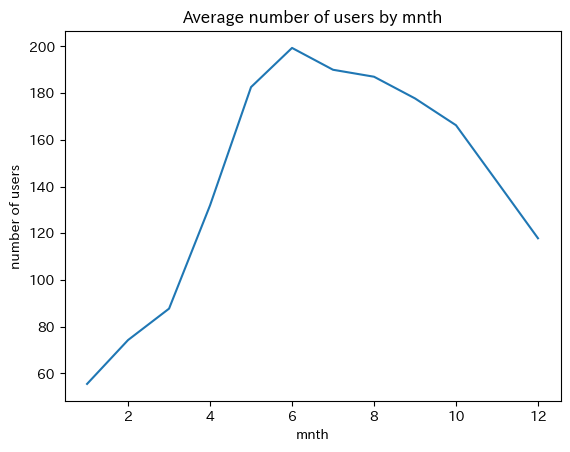

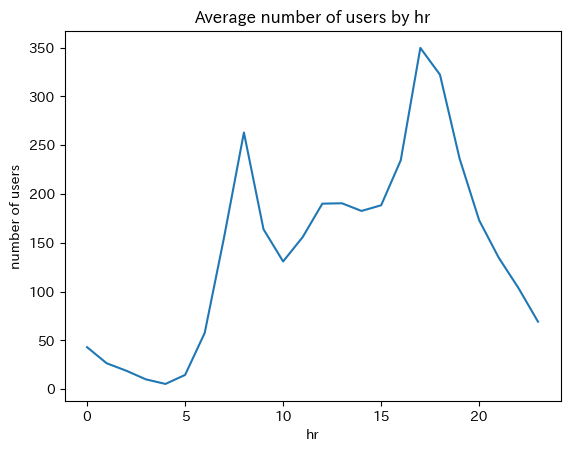

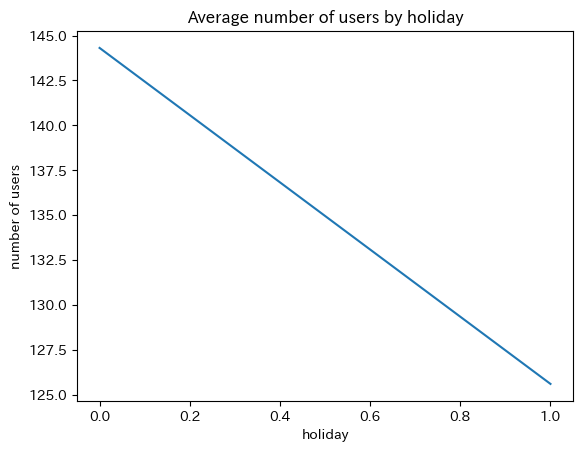

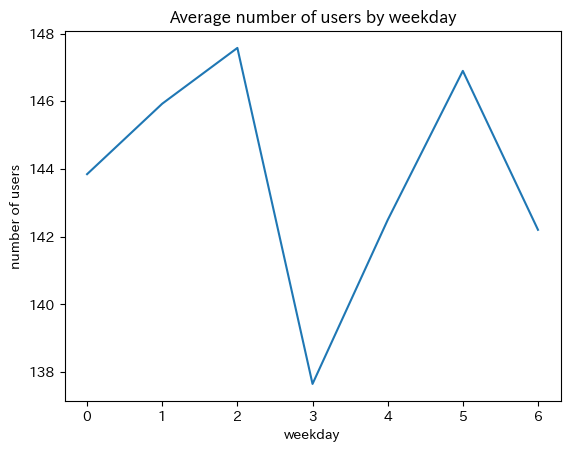

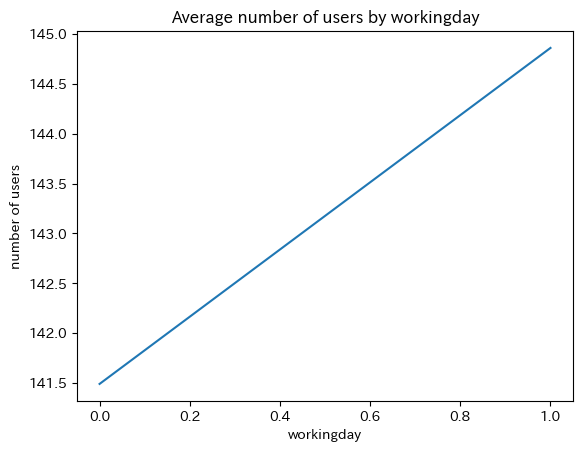

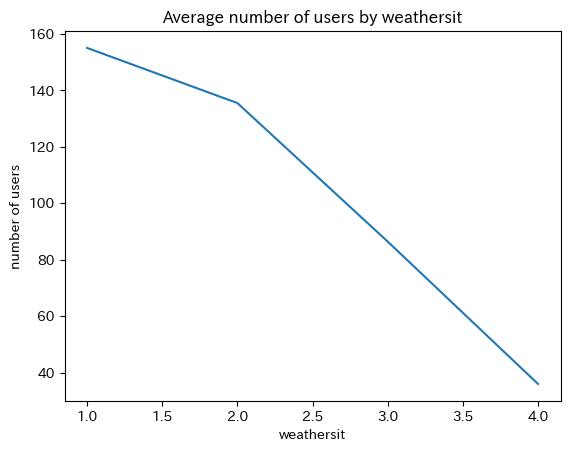

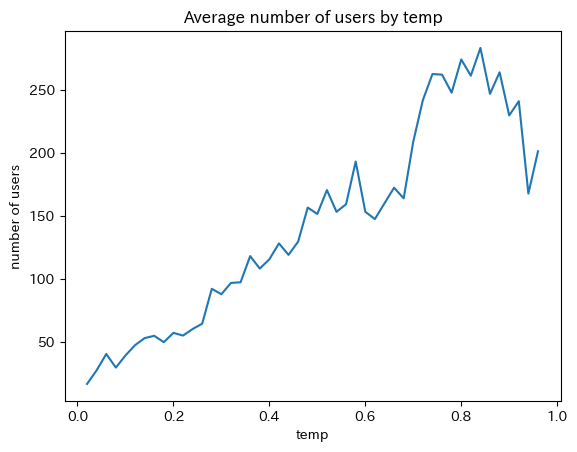

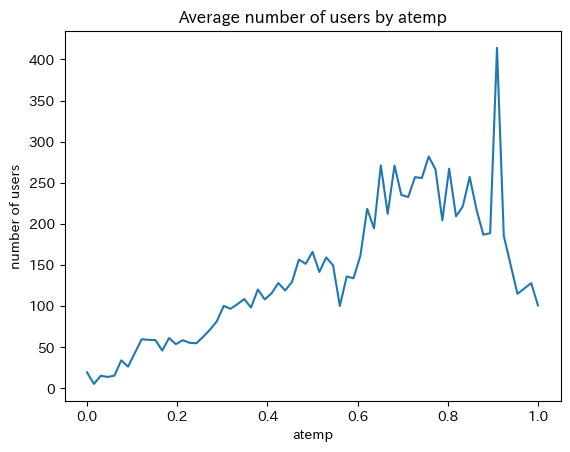

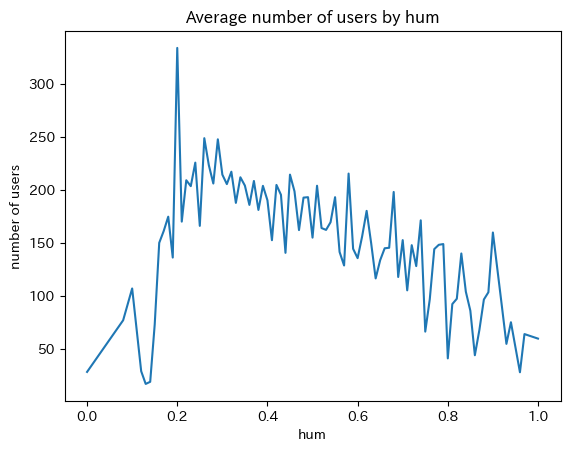

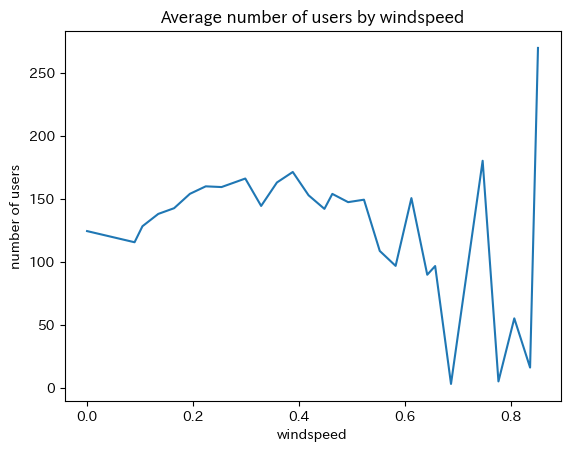

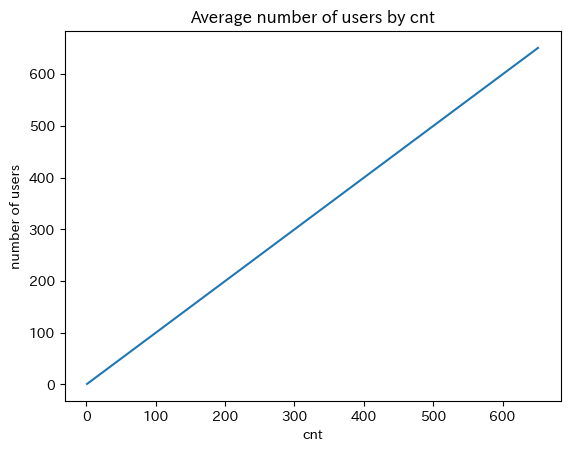

In [14]:
for i in range(len(header)):
  mk_graph_pra2cnt(train_df, header[i])

In [15]:
test_group3_df

id      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0      8646  2012-01-01       1   1     1   0        0        0           0   
1      8647  2012-01-01       1   1     1   1        0        0           0   
2      8648  2012-01-01       1   1     1   2        0        0           0   
3      8649  2012-01-01       1   1     1   3        0        0           0   
4      8650  2012-01-01       1   1     1   4        0        0           0   
...     ...         ...     ...  ..   ...  ..      ...      ...         ...   
8729  17375  2012-12-31       1   1    12  19        0        1           1   
8730  17376  2012-12-31       1   1    12  20        0        1           1   
8731  17377  2012-12-31       1   1    12  21        0        1           1   
8732  17378  2012-12-31       1   1    12  22        0        1           1   
8733  17379  2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed    cnt  
0              1  0.36  0.3788  0.66     0.0000   58.0  
1              1  0.36  0.3485  0.66     0.1343  153.0  
2              1  0.32  0.3485  0.76     0.0000  116.0  
3              1  0.30  0.3333  0.81     0.0000  188.0  
4              1  0.28  0.3030  0.81     0.0896  182.0  
...          ...   ...     ...   ...        ...    ...  
8729           2  0.26  0.2576  0.60     0.1642    NaN  
8730           2  0.26  0.2576  0.60     0.1642    NaN  
8731           1  0.26  0.2576  0.60     0.1642    NaN  
8732           1  0.26  0.2727  0.56     0.1343    NaN  
8733           1  0.26  0.2727  0.65     0.1343    NaN  

[8734 rows x 15 columns]

In [16]:
tokyo_group3_df

id      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2022-01-01     1.0   0     1   0      1.0      6.0         1.0   
1        2  2022-01-01     1.0   0     1   1      1.0      6.0         1.0   
2        3  2022-01-01     1.0   0     1   2      1.0      6.0         1.0   
3        4  2022-01-01     1.0   0     1   3      1.0      6.0         1.0   
4        5  2022-01-01     1.0   0     1   4      1.0      6.0         1.0   
...    ...         ...     ...  ..   ...  ..      ...      ...         ...   
8752  8754  2022-12-31     1.0   0    12  17      0.0      6.0         1.0   
8753  8755  2022-12-31     1.0   0    12  18      0.0      6.0         1.0   
8754  8756  2022-12-31     1.0   0    12  19      0.0      6.0         1.0   
8755  8757  2022-12-31     1.0   0    12  20      0.0      6.0         1.0   
8756  8758  2022-12-31     1.0   0    12  21      0.0      6.0         1.0   

      weathersit      temp     atemp   hum  windspeed  cnt  
0              1  0.096939  0.334248  0.40   0.516129   10  
1              1  0.091837  0.329867  0.41   0.397849    0  
2              1  0.091837  0.329867  0.40   0.376344    0  
3              1  0.086735  0.325486  0.41   0.344086    0  
4              1  0.073980  0.314533  0.43   0.344086    0  
...          ...       ...       ...   ...        ...  ...  
8752           1  0.216837  0.437207  0.68   0.193548  207  
8753           1  0.211735  0.432826  0.71   0.172043  163  
8754           1  0.224490  0.443779  0.69   0.150538  117  
8755           1  0.204082  0.426254  0.74   0.107527  100  
8756           1  0.176020  0.402157  0.81   0.096774   91  

[8757 rows x 15 columns]

In [17]:
def mk_graph_pra2cnt3(data_frame1, data_frame1_name, data_frame2, data_frame2_name, param_name, tag = None):
  if os.path.exists(f"../collabo_data/cnt_{tag}") == False:
    os.mkdir(f"../collabo_data/cnt_{tag}")
  ax = data_frame1.groupby(param_name)["cnt"].mean().plot(label=data_frame1_name, kind="bar", color="#ff0000", alpha=0.5)
  data_frame2.groupby(param_name)["cnt"].mean().plot(label=data_frame2_name, kind="bar", color="#0000ff", alpha=0.1)
  ax.set_title(f"Average number of users by {param_name} : ({tag})")
  ax.set_xlabel(param_name)
  ax.set_ylabel("number of users")
  ax.legend()
  # plt.savefig(f"/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第14回/collabo_data/cnt_{tag}/cnt_{param_name}_{tag}.png")
  plt.show()
  ax.cla()

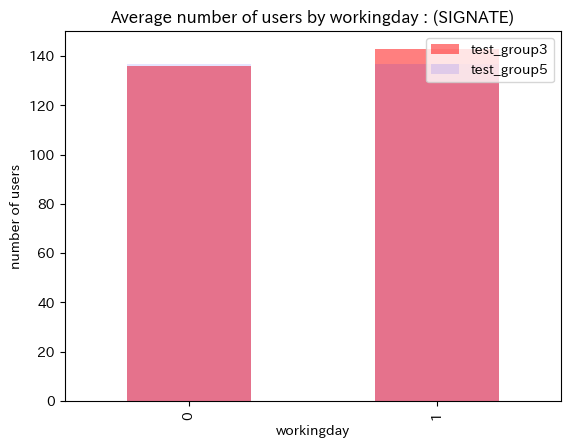

In [18]:
mk_graph_pra2cnt3(test_group3_df, "test_group3", test_group5_df, "test_group5", "workingday", tag = "SIGNATE")

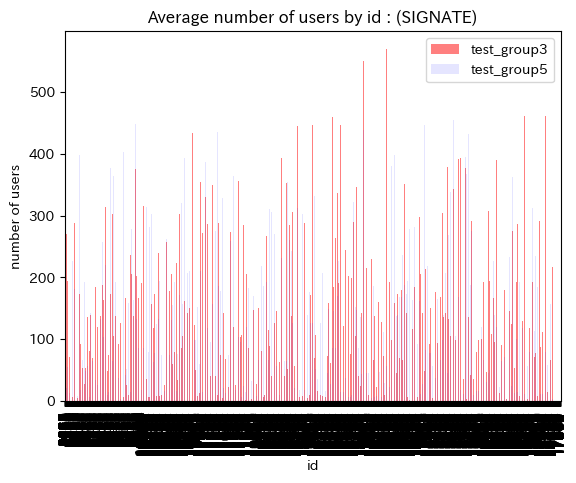

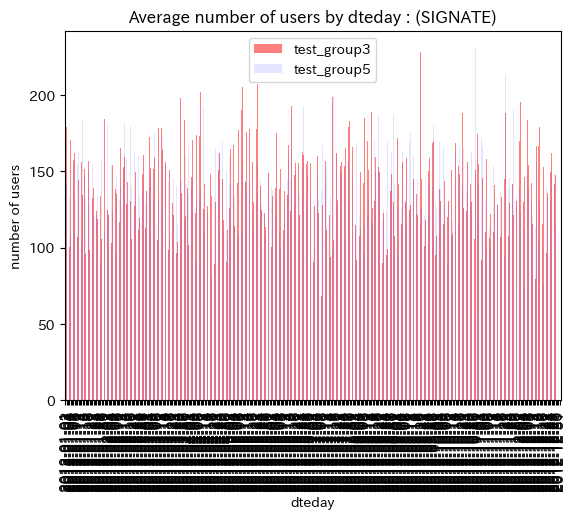

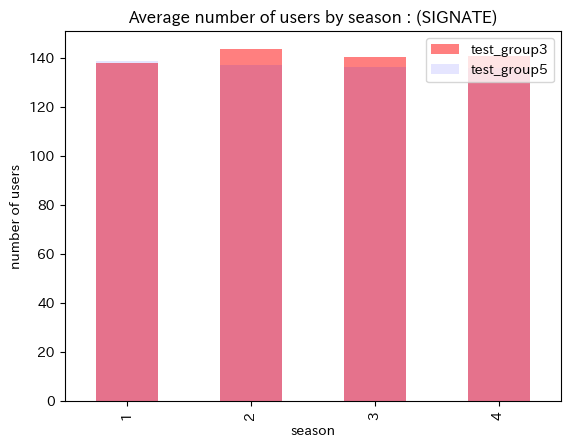

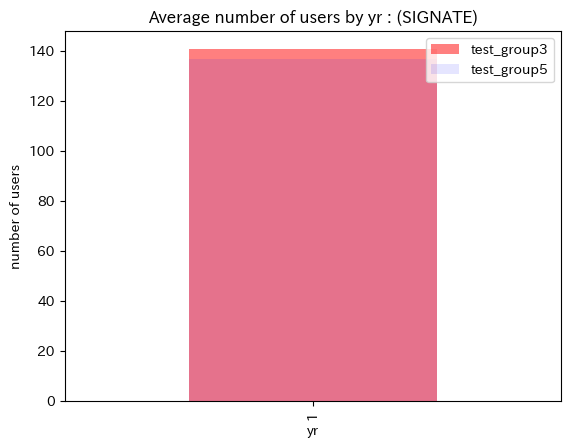

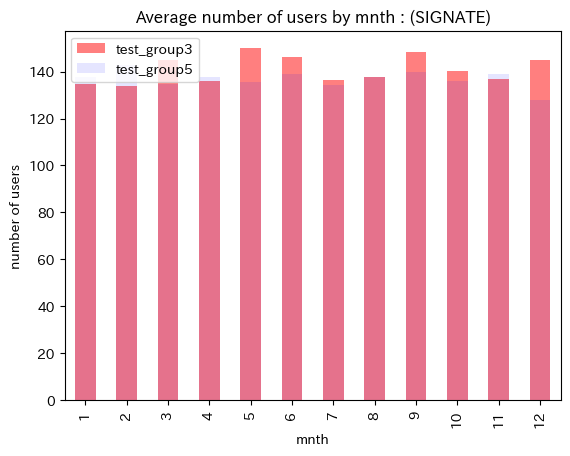

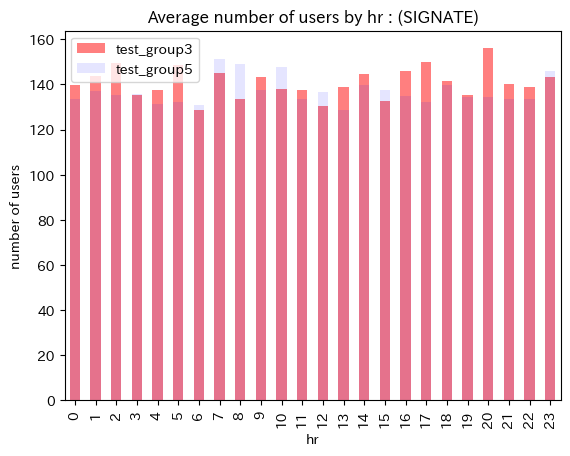

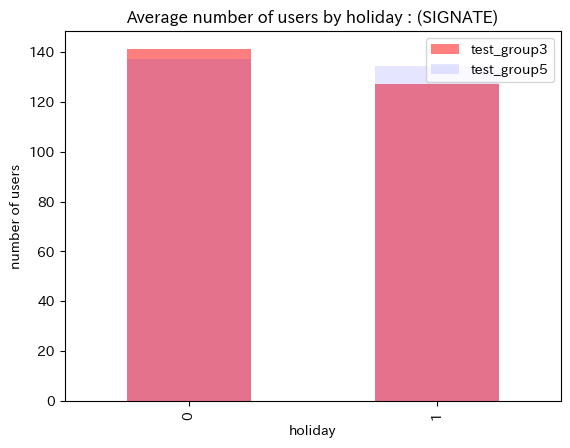

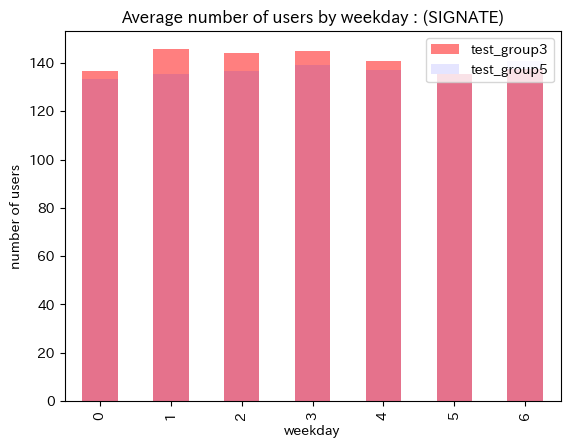

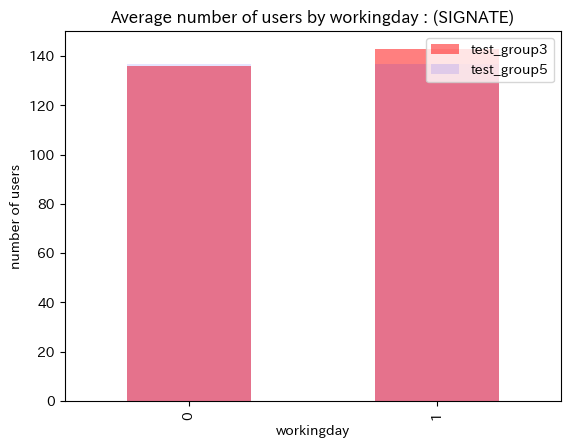

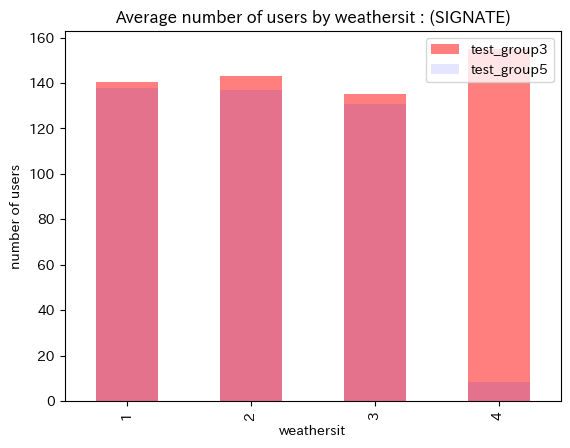

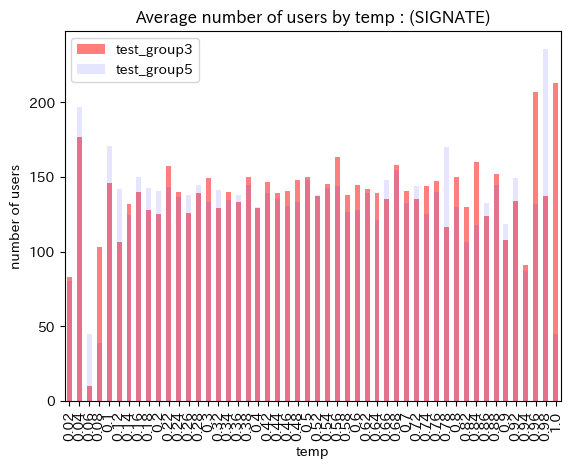

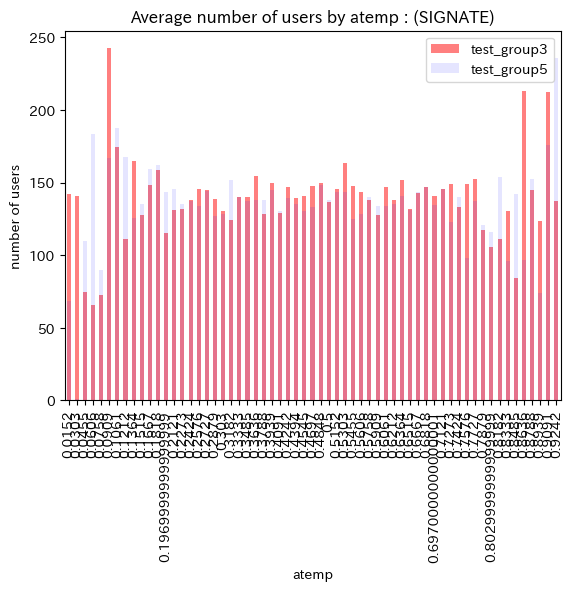

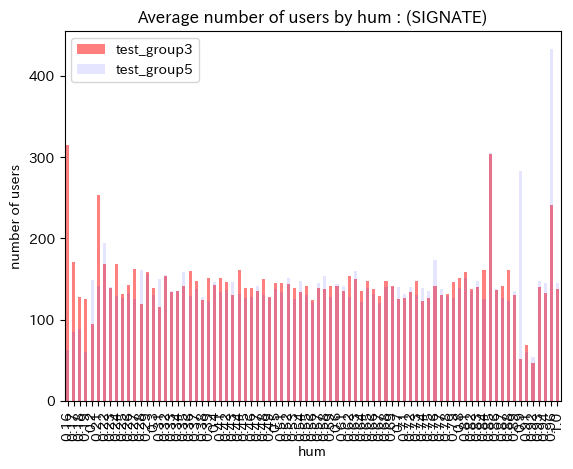

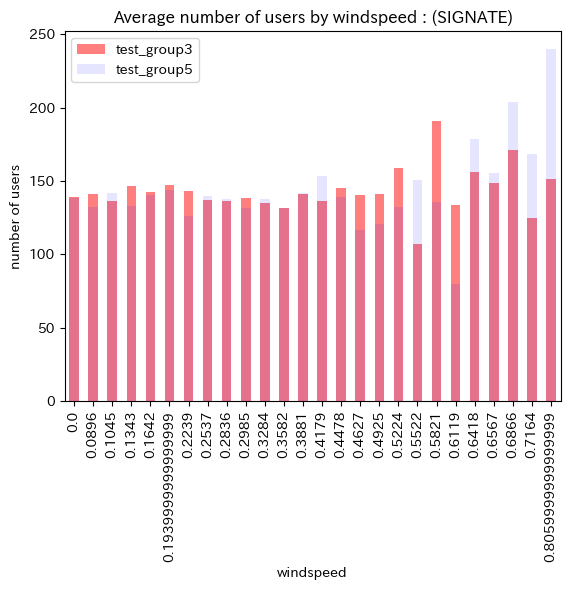

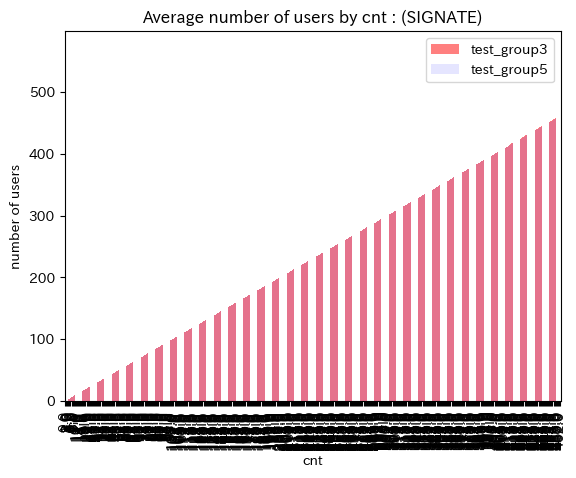

In [19]:
for i in range(len(header)):
  mk_graph_pra2cnt3(test_group3_df, "test_group3", test_group5_df, "test_group5", header[i], tag = "SIGNATE")

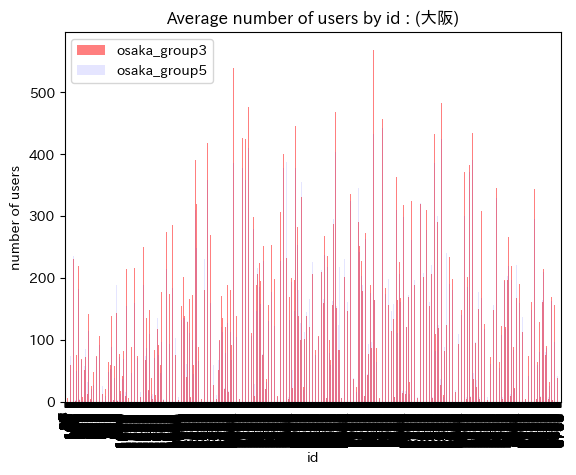

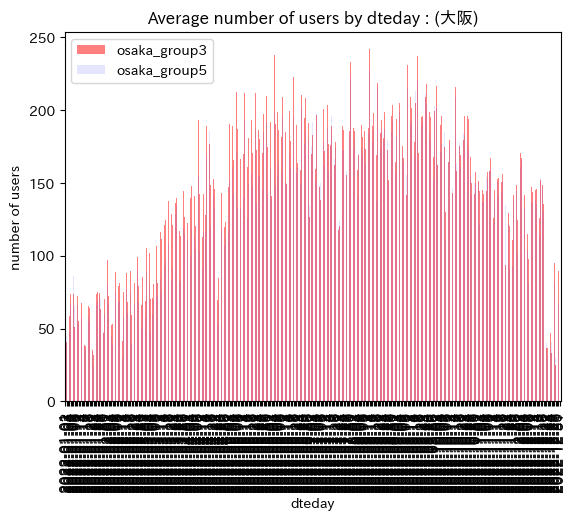

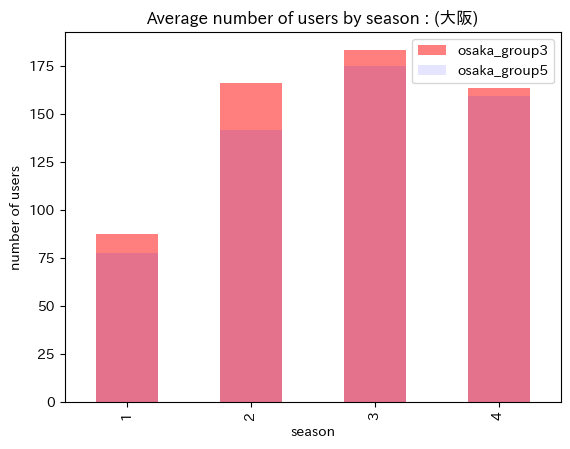

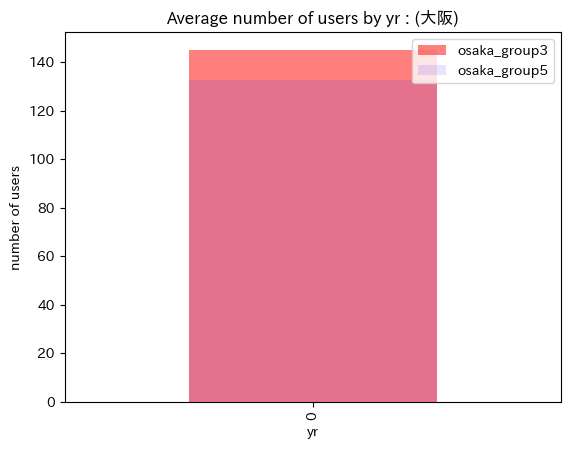

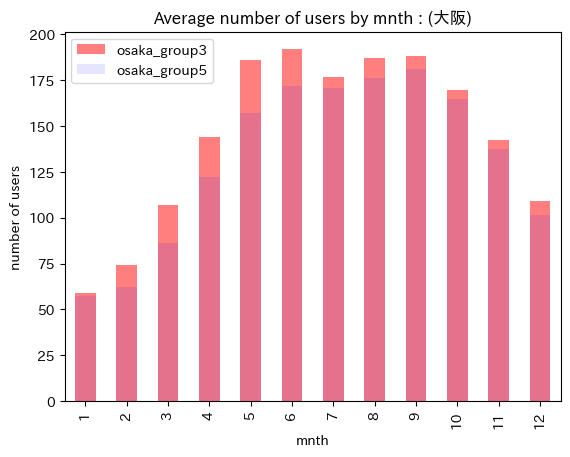

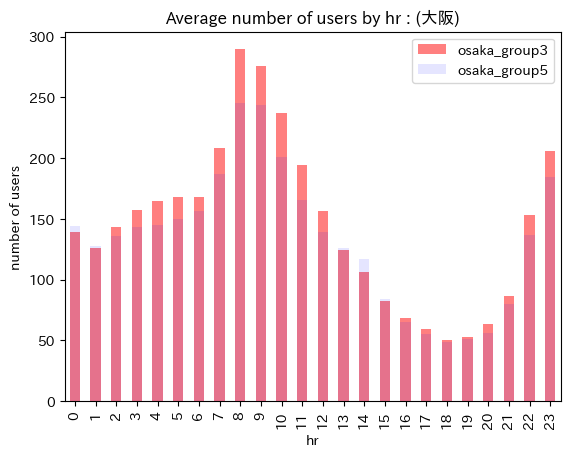

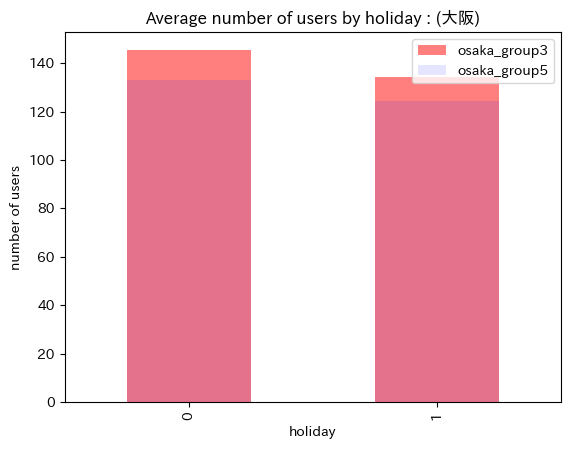

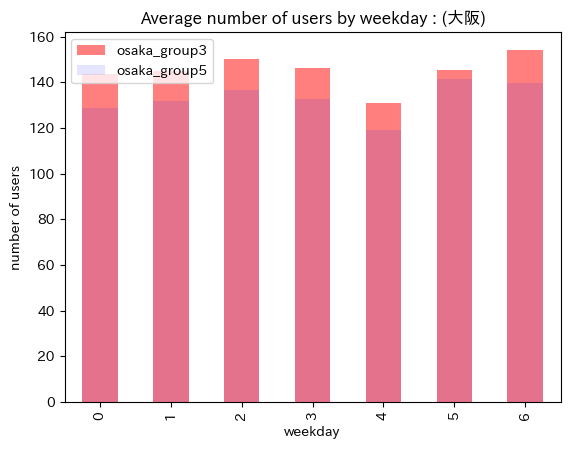

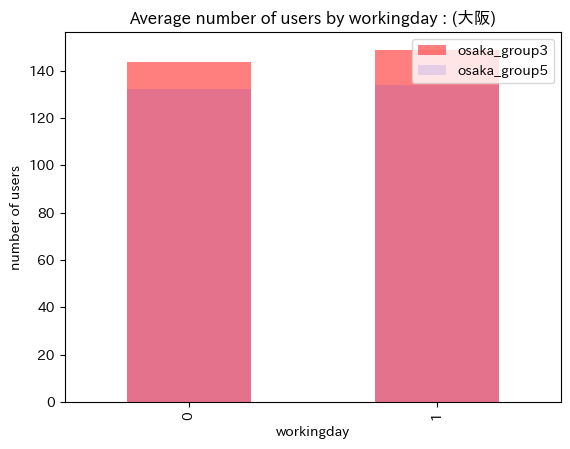

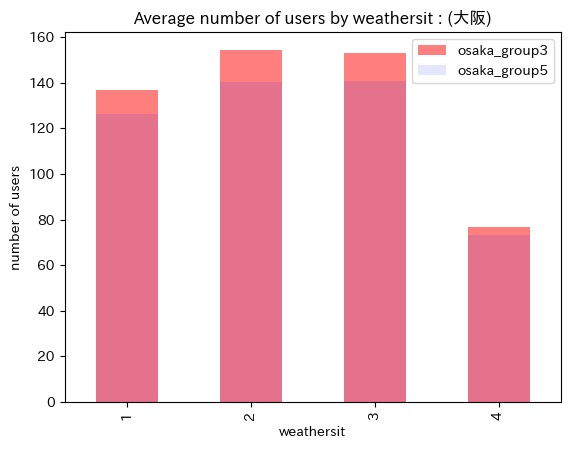

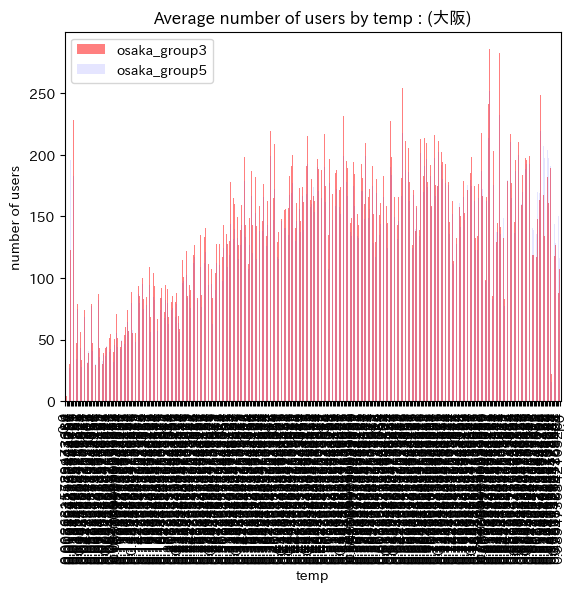

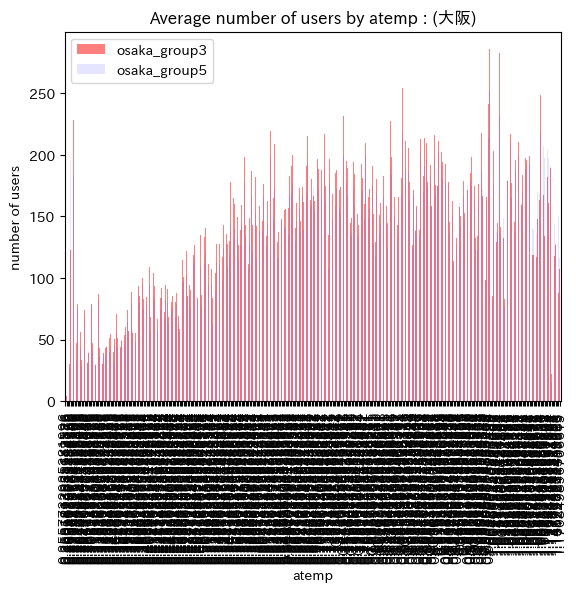

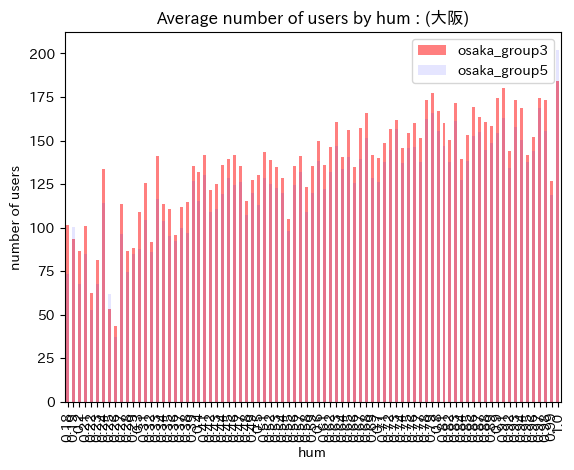

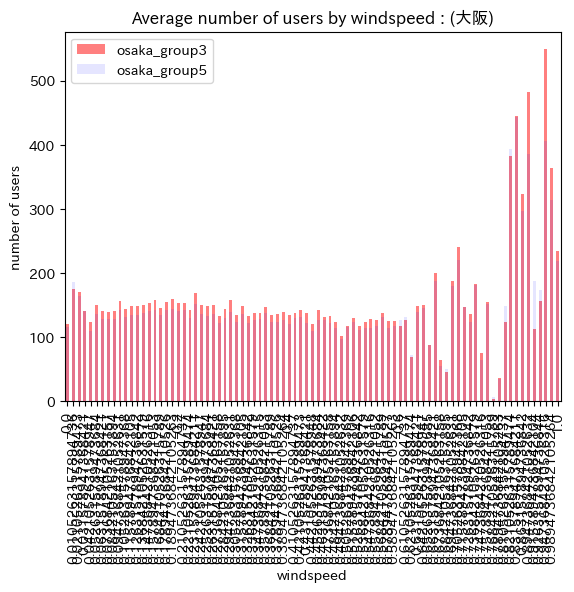

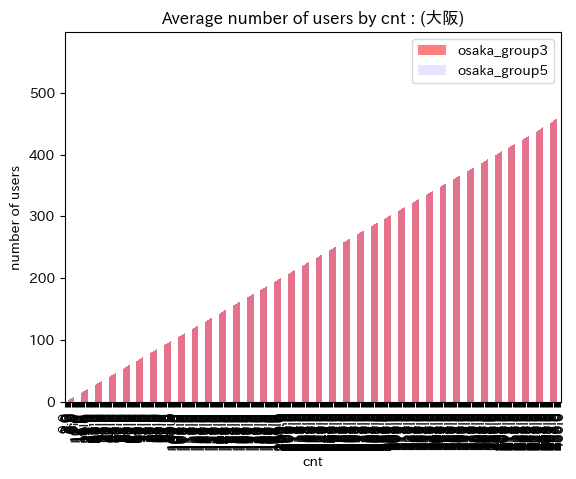

In [20]:
for i in range(len(header)):
  mk_graph_pra2cnt3(osaka_group3_df, "osaka_group3", osaka_group5_df, "osaka_group5", header[i], tag = "大阪")

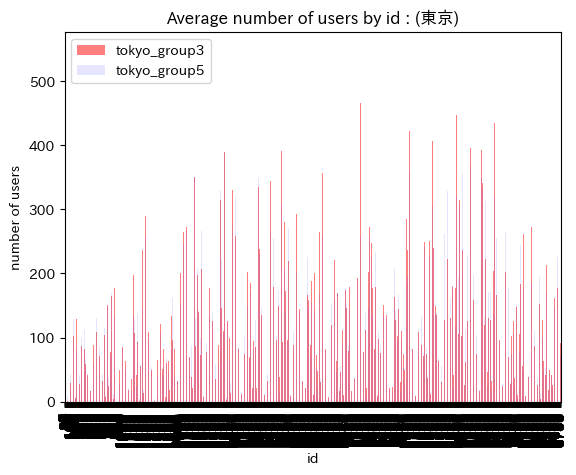

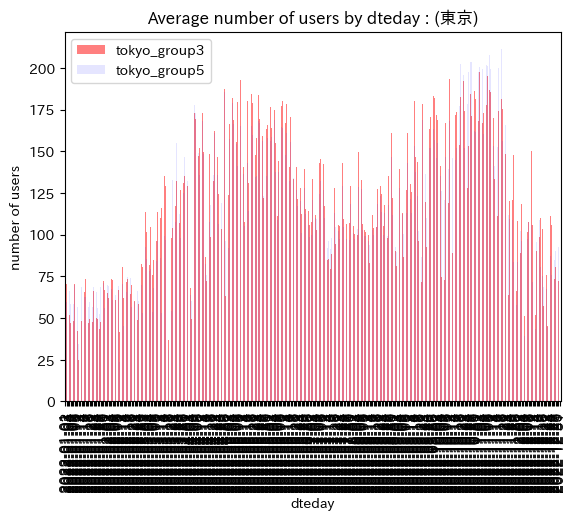

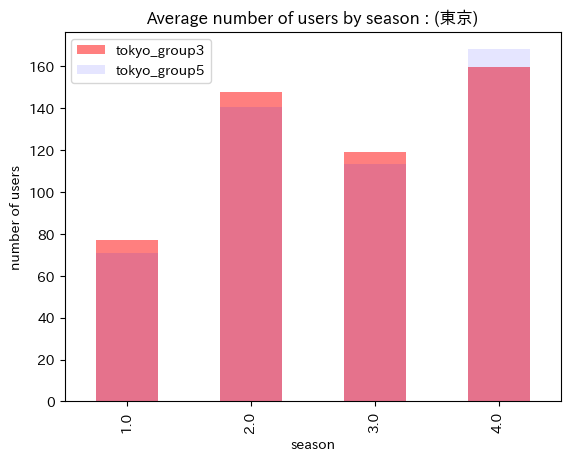

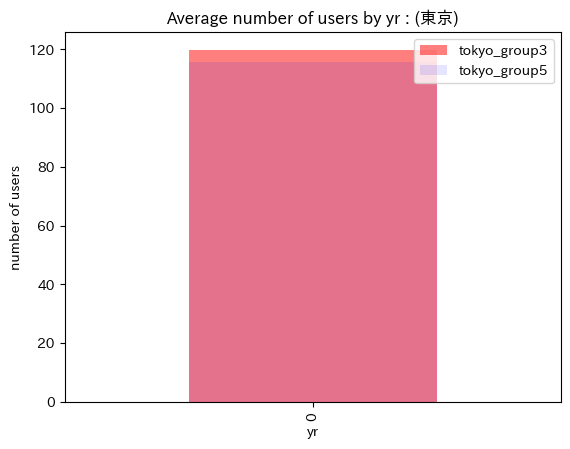

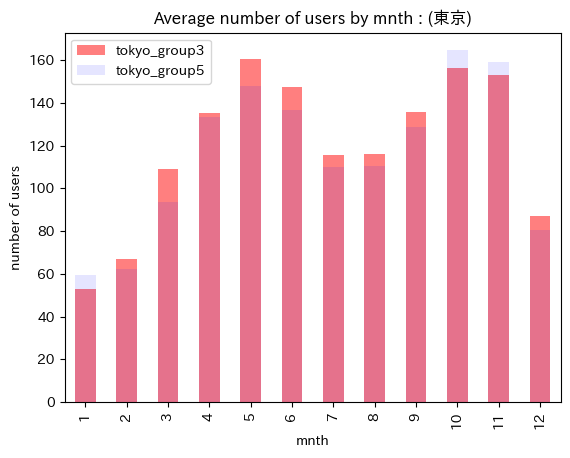

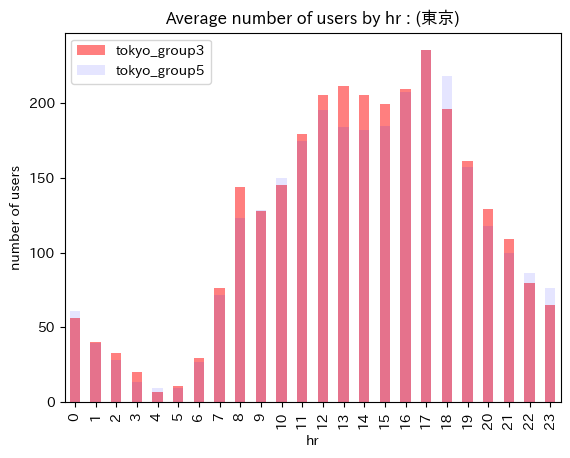

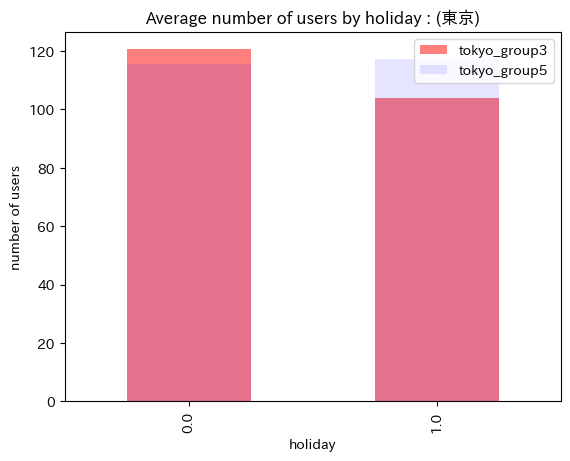

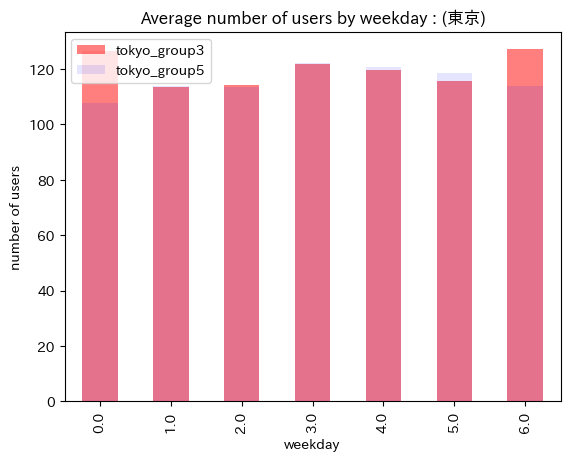

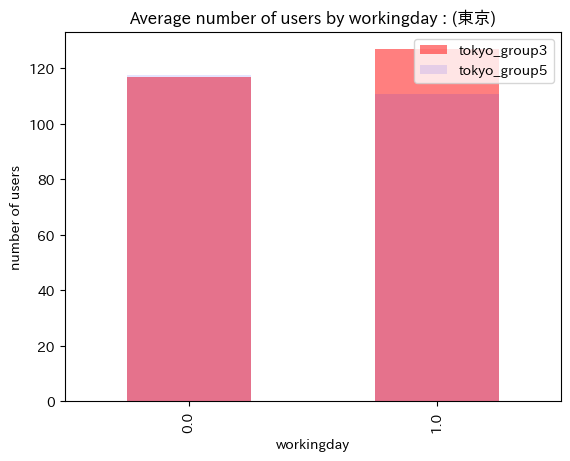

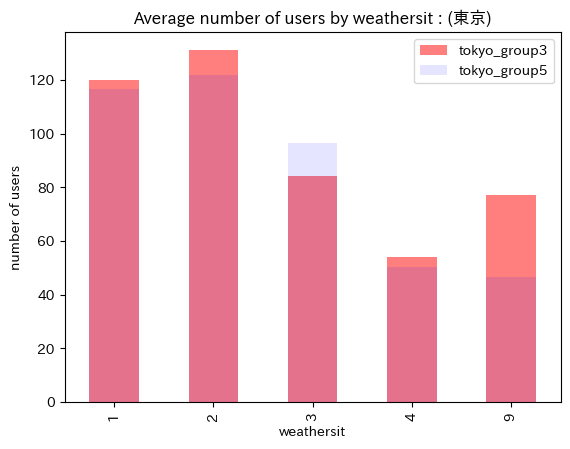

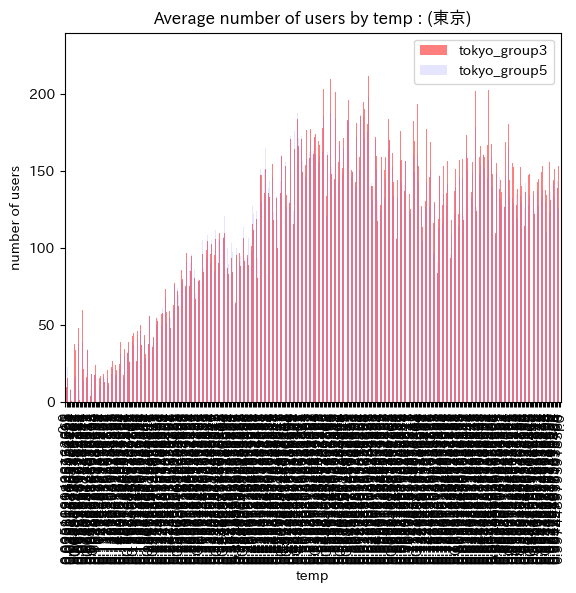

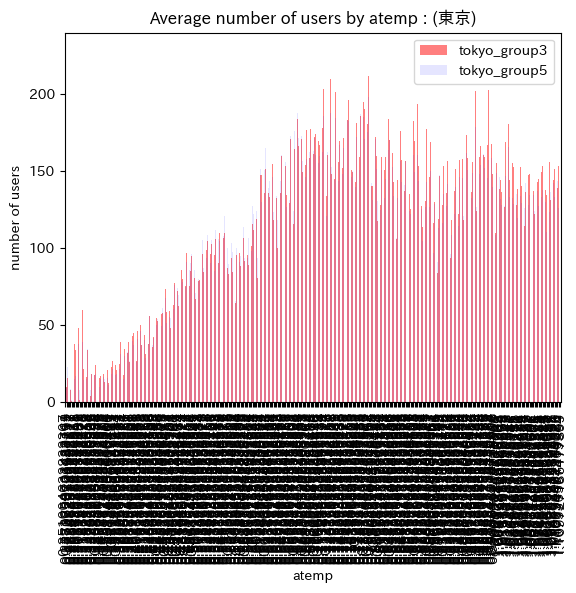

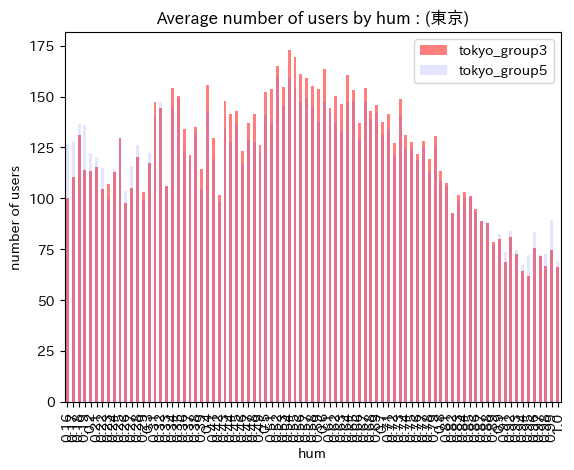

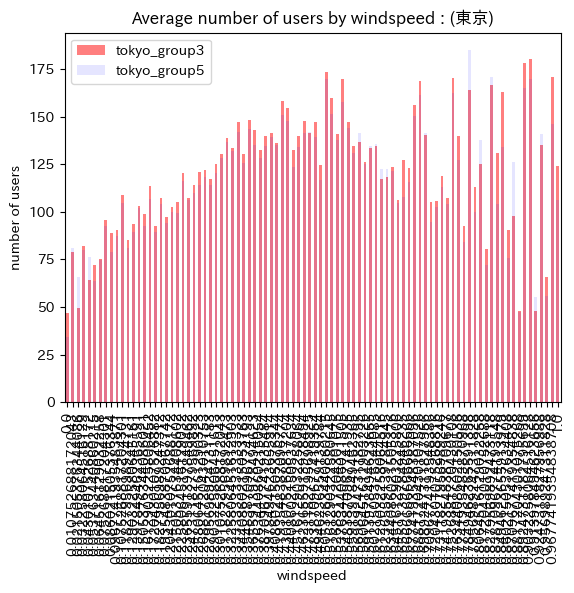

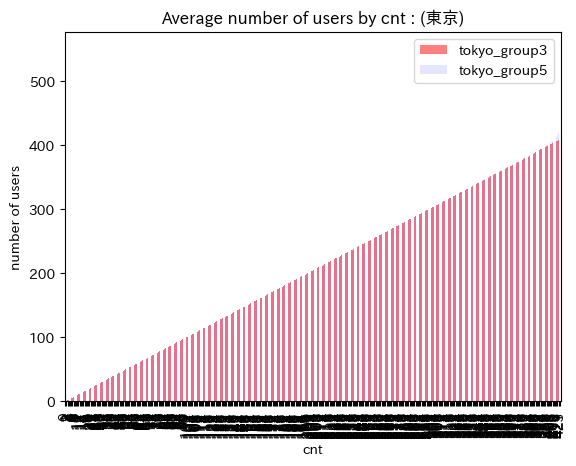

In [21]:
for i in range(len(header)):
  mk_graph_pra2cnt3(tokyo_group3_df, "tokyo_group3", tokyo_group5_df, "tokyo_group5", header[i], tag = "東京")

In [22]:
# group3_bias
g3b = np.array([[22.17 / 4],  #季節を正規化
                [17.93 / 12], #月を正規化
                [40.75 / 23], #時間を正規化
                [-0.04 / 6.0],   #曜日を正規化
                [14.33 / 4.0],   #天気を正規化
                [-2.29],
                [1.17],
                [45.12],
                [44.70],
                [-28.86],
                [8.54]])

In [23]:
# group5_bias
g5b = np.array([[2.7 / 4],   #季節を正規化
                [1.8 / 12], #月を正規化
                [62.3 / 23], #時間を正規化
                [1.4 / 6.0],   #曜日を正規化
                [2.2 / 4.0],   #天気を正規化
                [0.2],
                [5.6],
                [9.5],
                [8.9],
                [3.4],
                [1.5]])

In [24]:
np.set_printoptions(suppress=True, precision=8)
print(f"group3_bias = {list(g3b.reshape(-1))}")
print(f"group5_bias = {list(g5b.reshape(-1))}")

group3_bias = [5.5425, 1.4941666666666666, 1.7717391304347827, -0.006666666666666667, 3.5825, -2.29, 1.17, 45.12, 44.7, -28.86, 8.54]
group5_bias = [0.675, 0.15, 2.7086956521739127, 0.2333333333333333, 0.55, 0.2, 5.6, 9.5, 8.9, 3.4, 1.5]
